In [9]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hirar_utils
from sklearn.cluster import AgglomerativeClustering

sb.set_theme()

# import data frames
%store -r final_data
# simplified dataframe with Principal components
%store -r data6D

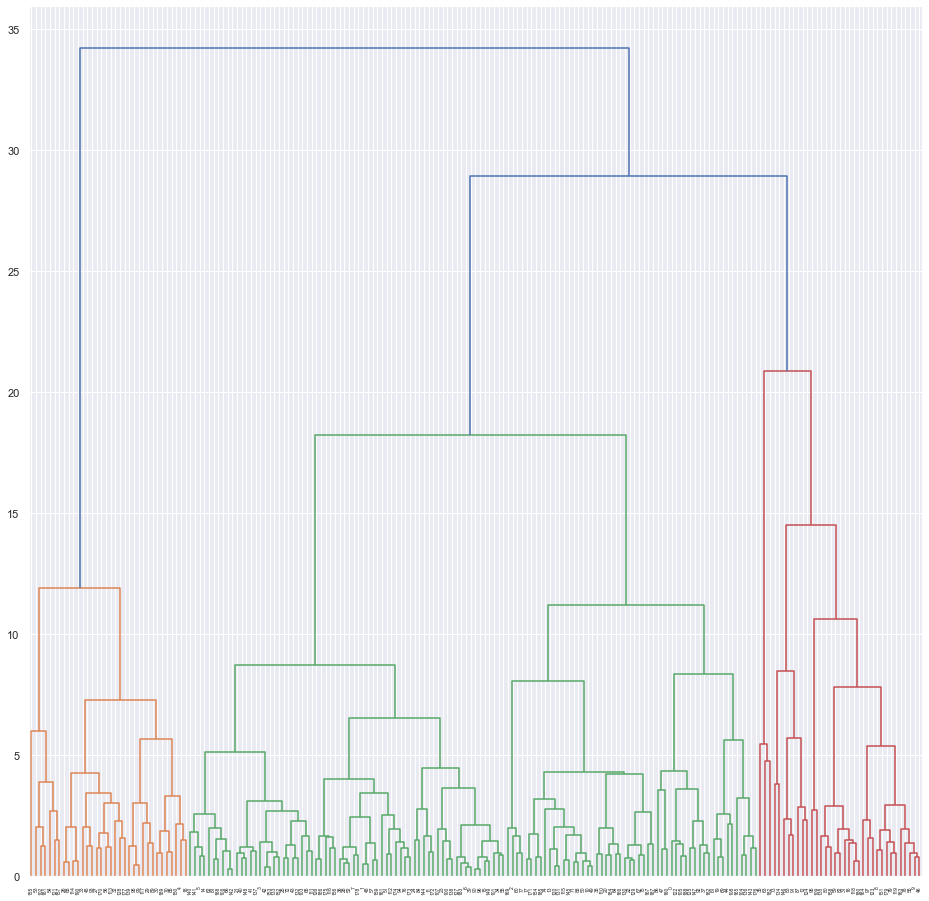

In [10]:
data6DCP = data6D.copy()
countries = data6DCP["Country"]
data6DCP = data6DCP.drop(columns=["Country"])
plt.figure(figsize=(16,16))

LINKAGE = 'ward'
DISTANCE = 'euclidean'
dend = hirar_utils.dendrogram(hirar_utils.linkage(data6DCP, method=LINKAGE, metric=DISTANCE))

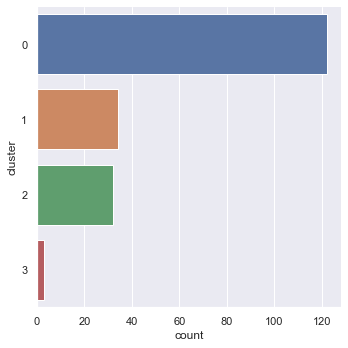

In [11]:
# do clustering
hc = AgglomerativeClustering(n_clusters=4, affinity=DISTANCE, linkage=LINKAGE)
cluster_labels = hc.fit_predict(data6DCP)

# add cluster labels back to data
clustered_data = data6DCP.copy()
clustered_data["cluster"] = pd.Categorical(cluster_labels)

# Summary of the Clusters
sb.catplot(y = "cluster", data = clustered_data, kind = "count")